# Logistic Regression With IRIS data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
import os
import urllib.request

data_location = "iris.csv"
data_url = 'https://elephantscale-public.s3.amazonaws.com/data/iris/iris_combined.csv'

if not os.path.exists (data_location):
    data_location = os.path.basename(data_location)
    if not os.path.exists(data_location):
        print("Downloading : ", data_url)
        urllib.request.urlretrieve(data_url, data_location)
print('data_location:', data_location)

data_location: iris.csv


In [3]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

iris = pd.read_csv(data_location)
iris.sample(10)

,c1,c2,c3,c4,label
0,6.40,2.80,5.60,2.20,3
81,6.10,2.90,4.70,1.40,2
23,6.10,2.60,5.60,1.40,3
35,6.90,3.20,5.70,2.30,3
116,5.70,3.00,4.20,1.20,2
13,5.40,3.90,1.70,0.40,1
104,5.00,3.40,1.60,0.40,1
55,6.00,3.00,4.80,1.80,3
10,5.20,2.70,3.90,1.40,2
88,6.00,2.70,5.10,1.60,2


## Exploratory Data Analysis (EDA)

In [4]:
iris.describe()

,c1,c2,c3,c4,label
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20,2.00
std,0.83,0.43,1.76,0.76,0.82
min,4.30,2.00,1.00,0.10,1.00
25%,5.10,2.80,1.60,0.30,1.00
50%,5.80,3.00,4.35,1.30,2.00
75%,6.40,3.30,5.10,1.80,3.00
max,7.90,4.40,6.90,2.50,3.00


In [5]:
# how are our labels distributed

iris['label'].value_counts()

1    50
2    50
3    50
Name: label, dtype: int64

In [6]:
iris['label'].value_counts(normalize=True)

1   0.33
2   0.33
3   0.33
Name: label, dtype: float64

## Shape Data

In [7]:
x = iris[['c1', 'c2', 'c3', 'c4']]
y = iris['label']
print ('x : ', x.shape)
print ('y : ', y.shape)

x :  (150, 4)
y :  (150,)


## Split train/test

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x,y,  test_size=0.2)
print ("x_train :" , x_train.shape )
print ("x_test :", x_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train : (120, 4)
x_test : (30, 4)
y_train : (120,)
y_test : (30,)


## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500)

# Fit the model
model = lr.fit(x_train, y_train)


In [10]:
print('coef : ', model.coef_)
print('intercept' , model.intercept_)

coef :  [[-0.3767382   0.92795644 -2.36382453 -1.03197513]
 [ 0.51215987 -0.34995115 -0.23089672 -0.7357364 ]
 [-0.13542167 -0.57800529  2.59472124  1.76771153]]
intercept [  9.04370948   2.14470272 -11.1884122 ]


## Model Evaluation

In [11]:
y_pred = model.predict (x_test)
y_pred

array([1, 2, 2, 1, 1, 1, 2, 3, 1, 3, 1, 3, 2, 2, 1, 1, 2, 3, 1, 2, 3, 2,
       3, 3, 1, 3, 2, 3, 3, 1])

In [12]:
train_accuracy = model.score(x_train,y_train)
test_accuracy = model.score(x_test,y_test)

print ("Train accuracy: ", train_accuracy)
print ("Test accuracy: ", test_accuracy)

Train accuracy:  0.9666666666666667
Test accuracy:  1.0


In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm_labels = np.unique(y)
cm_array = confusion_matrix(y_test, y_pred)
# print (cm_array)

cm_df = pd.DataFrame(cm_array, index=cm_labels, columns=cm_labels)
cm_df

,1,2,3
1,11,0,0
2,0,9,0
3,0,0,10


[]

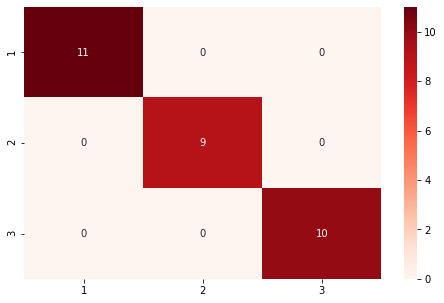

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm_df, annot=True, cmap="Reds", fmt='d').plot()